<a href="https://colab.research.google.com/github/Fcazarez/Ecuador_Data_Science/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: mount my drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

url = '/content/sample_data/diabetes.csv'
df = pd.read_csv(url)

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000,...,1.000,6.000,2.000,9.000,9.000,10.000,2.00,5.000,1.000,1.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000,...,106.000,190.000,88.000,170.000,89.000,101.000,122.00,121.000,126.000,93.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000,...,76.000,92.000,58.000,74.000,62.000,76.000,70.00,72.000,60.000,70.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000,...,0.000,0.000,26.000,31.000,0.000,48.000,27.00,23.000,0.000,31.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000,...,0.000,0.000,16.000,0.000,0.000,180.000,0.00,112.000,0.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000,...,37.500,35.500,28.400,44.000,22.500,32.900,36.80,26.200,30.100,30.400
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232,...,0.197,0.278,0.766,0.403,0.142,0.171,0.34,0.245,0.349,0.315
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000,...,26.000,66.000,22.000,43.000,33.000,63.000,27.00,30.000,47.000,23.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,...,0.000,1.000,0.000,1.000,0.000,0.000,0.00,0.000,1.000,0.000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

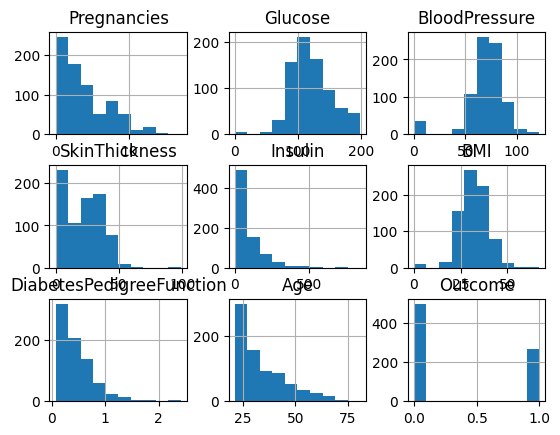

In [8]:
df.hist()

tiene algunos outliers que deben ser limpiados

In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']  # y = df.Outcome

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78, stratify=y)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(614, 8)
(154, 8)
(614,)
(154,)


In [15]:
from sklearn.ensemble import RandomForestClassifier



In [20]:
params = {'n_estimators': [10, 20, 30, 100, 200],
          'max_features': ['sqrt', 'log2'],
          'max_depth': [6, 7, 8],
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': [1, 2, 3],
          'criterion': ['gini', 'entropy']}

In [21]:
grid_search = GridSearchCV(RandomForestClassifier(random_state = 78),
                           params,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1, )

In [22]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=78), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20, 30, 100, 200]},
             scoring='accuracy')

In [23]:
grid_search.cv_results_

{'mean_fit_time': array([0.03390369, 0.06443286, 0.09262304, 0.29752774, 0.78585153,
        0.09725289, 0.07147384, 0.08857398, 0.29101291, 0.575247  ,
        0.03256197, 0.06026478, 0.09120193, 0.45267124, 1.02020016,
        0.05313034, 0.10031786, 0.14537277, 0.48054347, 0.78052936,
        0.03396926, 0.06186647, 0.08844242, 0.29189296, 0.57434087,
        0.03193684, 0.06229997, 0.09108801, 0.29222908, 0.56688299,
        0.03175797, 0.06401811, 0.08804975, 0.28514256, 0.57463336,
        0.03240075, 0.06041698, 0.09122853, 0.35951781, 1.05690846,
        0.05408673, 0.10724692, 0.14160957, 0.47850828, 0.81469903,
        0.03473396, 0.06353755, 0.09277458, 0.30311508, 0.60602403,
        0.03410454, 0.06395311, 0.09323559, 0.30894451, 0.60765543,
        0.03619323, 0.06534462, 0.09384155, 0.30600028, 0.60269775,
        0.03490415, 0.06612453, 0.09312153, 0.43234487, 1.03961368,
        0.05698481, 0.10977917, 0.15565314, 0.48522325, 0.83094511,
        0.03353868, 0.06261511,

In [24]:
best_params = grid_search.best_params_  # best parameters
best_score = grid_search.best_score_  # accuracy
best_estimator = grid_search.best_estimator_  # model

print(best_params)
print(best_score)
print(best_estimator)


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.7867253098760496
RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=200,
                       random_state=78)


In [26]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=200,
                       random_state=78)

In [27]:
import pickle

with open('/content/drive/MyDrive/Colab_Notebooks/CienciadeDatosEc/Diabetes_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [28]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
score_test = accuracy_score(y_test, y_pred)
print(score_test)

0.7597402597402597


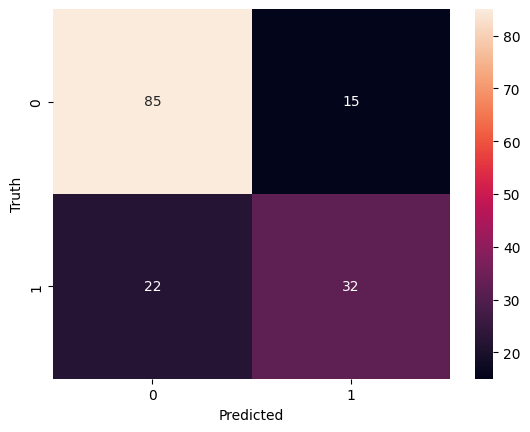

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()



Validacion Cruzada

In [44]:
from sklearn.model_selection import cross_val_score, KFold


kf = KFold(n_splits=5, shuffle=True, random_state=78)


scores = cross_val_score(best_model, X, y, cv=kf)
print(scores)
print(scores.mean())

[0.75974026 0.77922078 0.75974026 0.75816993 0.75816993]
0.7630082335964689


In [46]:
bf = best_model.feature_importances_

In [49]:
df_bf = pd.DataFrame(bf, index=X.columns, columns=['importance'])
df_bf = df_bf.sort_values(by='importance', ascending=False)  # sort by importance
df_bf

,importance
Glucose,0.293044
BMI,0.163932
Age,0.146143
DiabetesPedigreeFunction,0.103365
Insulin,0.080824
Pregnancies,0.077338
BloodPressure,0.069350
SkinThickness,0.066003


<Axes: xlabel='importance'>

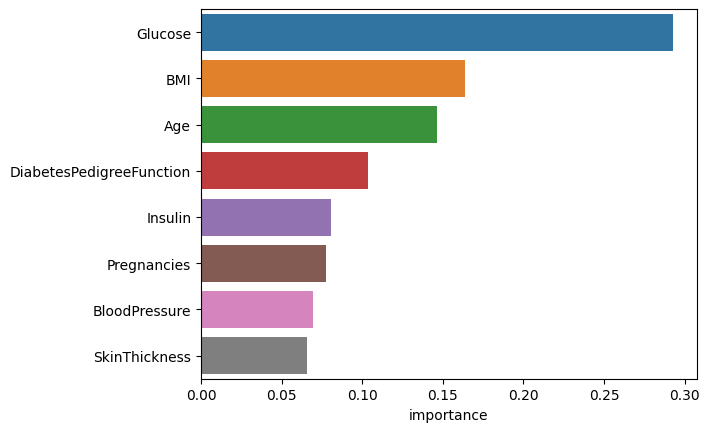

In [50]:
sns.barplot(x=df_bf.importance, y=df_bf.index)